In [53]:
%matplotlib inline

### Install Python Packages

In [54]:
# include our Python packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Function
import torch.optim as optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

### Get MNIST Dataset and DataLoader

In [55]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=50, shuffle=True)

test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=50, shuffle=True)

#### View Images

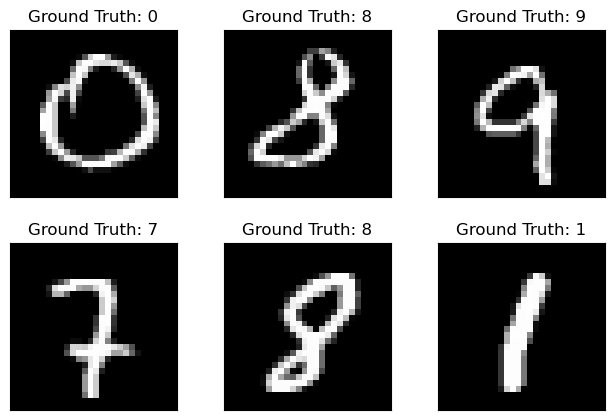

In [56]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

### Create MLP

In [57]:
class MLP(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(D_in, H1),
            nn.ReLU(),
            nn.Linear(H1, H2),
            nn.ReLU(),
            nn.Linear(H2, D_out),
        )
    def forward(self, x):
        y_pred = self.layers(x)
        return y_pred

### Create Convolutional Nerual Net

In [58]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

### Select Model and Define HyperParameters

In [59]:
# model = MLP(
#     D_in = 28*28,
#     H1 = 28*28,
#     H2 = 128,
#     D_out = 10,
# )
model = CNN()

epochs = 10
learning_rate = 0.001
momentum = 0.3

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

status_interval = 10

### Define Training Function

In [60]:
train_loss = []
train_count = []
test_loss = []
test_count = [i*len(train_loader.dataset) for i in range(epochs + 1)]

def train(epoch, dataloader, optimizer):
    model.train()
    for batch, (data, label) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, label)
        loss.backward()

        optimizer.step()

        if batch % status_interval == 0:
            print(f'Train Epoch: {epoch} [{batch * len(data)}/{len(dataloader.dataset)}] ({batch * 100 / len(dataloader):.0f}%)\tLoss: {loss.item():.6f}')
            train_loss.append(loss.item())
            train_count.append((batch*64) + ((epoch-1)*len(dataloader.dataset)))

### Define Training Function

In [61]:
def test(dataloader):
    model.eval()
    loss = 0
    correct = 0
    with torch.no_grad():
        for data, label in dataloader:
            output = model(data)
            loss += F.nll_loss(output, label, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(label.data.view_as(pred)).sum()
    loss /= len(dataloader.dataset)
    test_loss.append(loss)
    print(f'\nTest Set: Avg. Loss: {loss:.4f}, Accuracy: {correct}/{len(dataloader.dataset)} ({100 * correct / len(dataloader.dataset):.0f}%)\n')

### Train Model

In [67]:
# test(dataloader=test_loader)
for epoch in range(0, epochs):
     train(epoch=epoch+1, dataloader=train_loader, optimizer=optimizer)
     test(dataloader=test_loader)

C:\Users\rdash\AppData\Local\Temp\ipykernel_10888\3801493435.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000] (0%)	Loss: 0.552445
Train Epoch: 1 [500/60000] (1%)	Loss: 0.300014
Train Epoch: 1 [1000/60000] (2%)	Loss: 0.314469
Train Epoch: 1 [1500/60000] (2%)	Loss: 0.465116
Train Epoch: 1 [2000/60000] (3%)	Loss: 0.478122
Train Epoch: 1 [2500/60000] (4%)	Loss: 0.406605
Train Epoch: 1 [3000/60000] (5%)	Loss: 0.312628
Train Epoch: 1 [3500/60000] (6%)	Loss: 0.409932
Train Epoch: 1 [4000/60000] (7%)	Loss: 0.342909
Train Epoch: 1 [4500/60000] (8%)	Loss: 0.649409
Train Epoch: 1 [5000/60000] (8%)	Loss: 0.420100
Train Epoch: 1 [5500/60000] (9%)	Loss: 0.199654
Train Epoch: 1 [6000/60000] (10%)	Loss: 0.197089
Train Epoch: 1 [6500/60000] (11%)	Loss: 0.215835
Train Epoch: 1 [7000/60000] (12%)	Loss: 0.412043
Train Epoch: 1 [7500/60000] (12%)	Loss: 0.392234
Train Epoch: 1 [8000/60000] (13%)	Loss: 0.333468
Train Epoch: 1 [8500/60000] (14%)	Loss: 0.192518
Train Epoch: 1 [9000/60000] (15%)	Loss: 0.334776
Train Epoch: 1 [9500/60000] (16%)	Loss: 0.387263
Train Epoch: 1 [10000/60000] (17%)	L

### Test Model

In [63]:
# test(test_loader)

C:\Users\rdash\AppData\Local\Temp\ipykernel_10888\3801493435.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test Set: Avg. Loss: 0.2304, Accuracy: 9318/10000 (93%)



### Plot Results

ValueError: x and y must be the same size

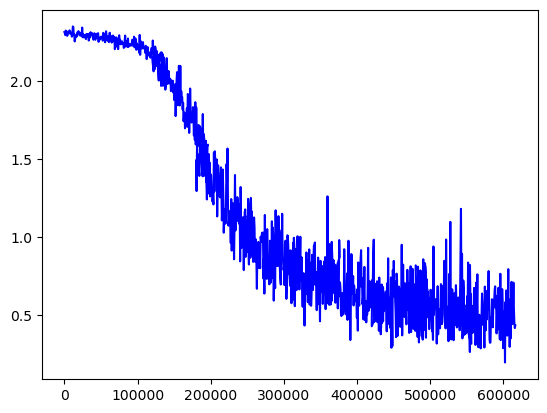

In [65]:
fig = plt.figure()
plt.plot(train_count, train_loss, color='blue')
plt.scatter(test_count, test_loss, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [ ]:
with torch.no_grad():
  output = model(example_data)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig